# Time series decomposition/forecast in Python

# Import libraries

In [1]:
import os
from dotenv import load_dotenv

import requests
import json

import pandas as pd
import numpy as np

import datetime as dt

import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

/Users/apple/.pyenv/versions/3.6.2/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/apple/.pyenv/versions/3.6.2/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Load FRED API key

In [2]:
load_dotenv()
API_KEY = os.getenv('API_KEY')

# Get time series data

In [3]:
INFO_GET_FORMAT = "https://api.stlouisfed.org/fred/series"
TIMESERIES_GET_FORMAT = "https://api.stlouisfed.org/fred/series/observations"
SERIES_ID = "NATURALGAS"
GET_QUERY = {'series_id':SERIES_ID, 'api_key':API_KEY, 'file_type':'json'}

In [4]:
info_result = requests.get(INFO_GET_FORMAT, params=GET_QUERY)
info_json = json.loads(info_result.text)['seriess'][0]
info_json

{'id': 'NATURALGAS',
 'realtime_start': '2018-09-13',
 'realtime_end': '2018-09-13',
 'title': 'Natural Gas Consumption',
 'observation_start': '2000-01-01',
 'observation_end': '2018-06-01',
 'frequency': 'Monthly',
 'frequency_short': 'M',
 'units': 'Billion Cubic Feet',
 'units_short': 'Bil. Cubic Feet',
 'seasonal_adjustment': 'Not Seasonally Adjusted',
 'seasonal_adjustment_short': 'NSA',
 'last_updated': '2018-08-20 09:51:02-05',
 'popularity': 27,
 'notes': 'This data is collected by the U.S. Energy Information Administration (EIA) available at: http://www.eia.gov/dnav/ng/hist/n9140us2m.htm and  http://www.eia.doe.gov/emeu/steo/pub/contents.html (forecast).'}

In [106]:
timeseries_result = requests.get(TIMESERIES_GET_FORMAT, params=GET_QUERY)
timeseries_json = json.loads(timeseries_result.text)
data_df = pd.DataFrame(timeseries_json['observations'])
data_df = data_df[['date', 'value']]
data_df['date'] = pd.to_datetime(data_df['date'])
data_df.set_index('date', inplace=True)
data_df['value'] = pd.to_numeric(data_df['value'])
data_df['log_value'] = np.log(data_df['value'])

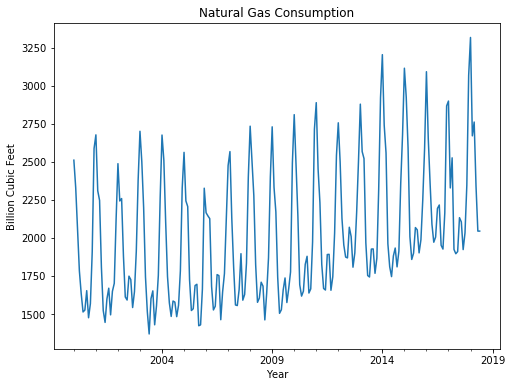

In [110]:
plt.figure(figsize=(8, 6))
data_df['value'].plot(title=info_json['title'])
plt.xlabel('Year');
plt.ylabel(info_json['units']);

# statsmodels.tsa.seasonal.seasonal_decompose
Reference:  

statsmodels.tsa.seasonal.seasonal_decompose  
https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html  
How to Decompose Time Series Data into Trend and Seasonality  
https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

In [111]:
seas_dec_result = seasonal_decompose(data_df['log_value'], model='additive', freq=12)

In [112]:
seas_dec_result.trend

date
2000-01-01         NaN
2000-02-01         NaN
2000-03-01         NaN
2000-04-01         NaN
2000-05-01         NaN
2000-06-01         NaN
2000-07-01    7.521110
2000-08-01    7.523405
2000-09-01    7.526828
2000-10-01    7.531186
2000-11-01    7.528821
2000-12-01    7.523965
2001-01-01    7.523964
2001-02-01    7.526302
2001-03-01    7.527242
2001-04-01    7.529885
2001-05-01    7.527195
2001-06-01    7.514100
2001-07-01    7.502743
2001-08-01    7.498457
2001-09-01    7.497447
2001-10-01    7.499333
2001-11-01    7.503371
2001-12-01    7.509779
2002-01-01    7.517563
2002-02-01    7.522695
2002-03-01    7.525402
2002-04-01    7.526641
2002-05-01    7.531468
2002-06-01    7.541172
                ...   
2016-01-01    7.710987
2016-02-01    7.716635
2016-03-01    7.720908
2016-04-01    7.720691
2016-05-01    7.717793
2016-06-01    7.720460
2016-07-01    7.722043
2016-08-01    7.713941
2016-09-01    7.711403
2016-10-01    7.710851
2016-11-01    7.705788
2016-12-01    7.702121
2017-0

In [113]:
seas_dec_result.seasonal

date
2000-01-01    0.334457
2000-02-01    0.225060
2000-03-01    0.144190
2000-04-01   -0.068115
2000-05-01   -0.172615
2000-06-01   -0.182674
2000-07-01   -0.092717
2000-08-01   -0.075882
2000-09-01   -0.195767
2000-10-01   -0.142153
2000-11-01   -0.007868
2000-12-01    0.234084
2001-01-01    0.334457
2001-02-01    0.225060
2001-03-01    0.144190
2001-04-01   -0.068115
2001-05-01   -0.172615
2001-06-01   -0.182674
2001-07-01   -0.092717
2001-08-01   -0.075882
2001-09-01   -0.195767
2001-10-01   -0.142153
2001-11-01   -0.007868
2001-12-01    0.234084
2002-01-01    0.334457
2002-02-01    0.225060
2002-03-01    0.144190
2002-04-01   -0.068115
2002-05-01   -0.172615
2002-06-01   -0.182674
                ...   
2016-01-01    0.334457
2016-02-01    0.225060
2016-03-01    0.144190
2016-04-01   -0.068115
2016-05-01   -0.172615
2016-06-01   -0.182674
2016-07-01   -0.092717
2016-08-01   -0.075882
2016-09-01   -0.195767
2016-10-01   -0.142153
2016-11-01   -0.007868
2016-12-01    0.234084
2017-0

In [114]:
seas_dec_result.resid

date
2000-01-01         NaN
2000-02-01         NaN
2000-03-01         NaN
2000-04-01         NaN
2000-05-01         NaN
2000-06-01         NaN
2000-07-01   -0.098250
2000-08-01   -0.037115
2000-09-01   -0.034647
2000-10-01   -0.031604
2000-11-01    0.033120
2000-12-01    0.100398
2001-01-01    0.034032
2001-02-01   -0.006576
2001-03-01    0.045742
2001-04-01    0.037764
2001-05-01   -0.026537
2001-06-01   -0.055976
2001-07-01   -0.033456
2001-08-01   -0.002475
2001-09-01    0.007599
2001-10-01    0.050805
2001-11-01   -0.056531
2001-12-01   -0.084598
2002-01-01   -0.032946
2002-02-01   -0.032453
2002-03-01    0.052820
2002-04-01    0.081032
2002-05-01    0.026068
2002-06-01    0.013872
                ...   
2016-01-01   -0.008870
2016-02-01   -0.058853
2016-03-01   -0.099868
2016-04-01   -0.007944
2016-05-01    0.041321
2016-06-01    0.065863
2016-07-01    0.063836
2016-08-01    0.065446
2016-09-01    0.060615
2016-10-01   -0.005342
2016-11-01   -0.018021
2016-12-01    0.024921
2017-0

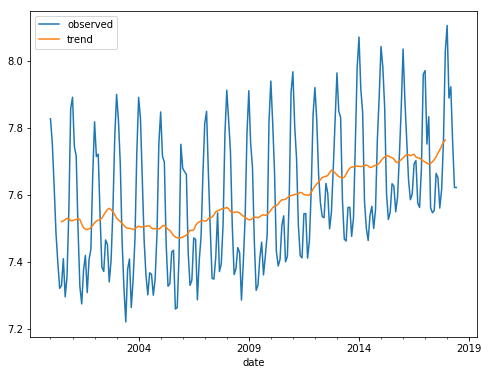

In [118]:
plt.figure(figsize=(8, 6))
seas_dec_result.observed.plot(label='observed');
seas_dec_result.trend.plot(label='trend');
plt.legend();

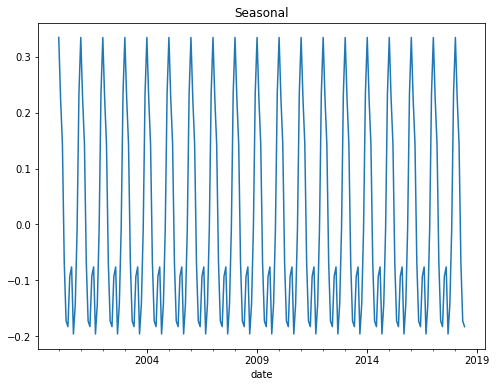

In [151]:
plt.figure(figsize=(8, 6))
seas_dec_result.seasonal.plot(title='Seasonal');

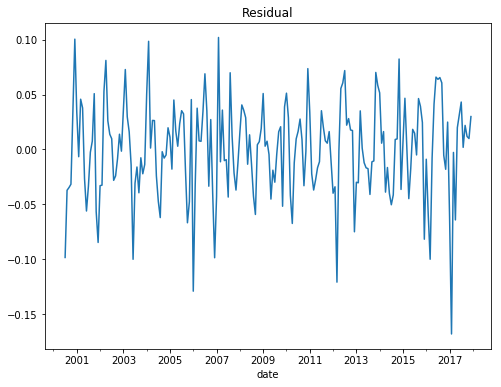

In [152]:
plt.figure(figsize=(8, 6))
seas_dec_result.resid.plot(title='Residual');

# sm.tsa.statespace.SARIMAX
Reference:  

A Guide to Time Series Forecasting with ARIMA in Python 3  
https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3  
Seasonal ARIMA with Python  
http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/
https://github.com/seanabu/seanabu.github.io/blob/master/Seasonal_ARIMA_model_Portland_transit.ipynb  
SARIMAX: Introduction  
https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html  
SARIMAX on mean visits  
https://www.kaggle.com/aless80/sarimax-on-mean-visits  
Implementing and estimating an ARMA(1, 1) state space model  
http://www.chadfulton.com/topics/arma11_cpi_inflation.html  
An End-to-End Project on Time Series Analysis and Forecasting with Python  
https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

## ACF, PACF

/Users/apple/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


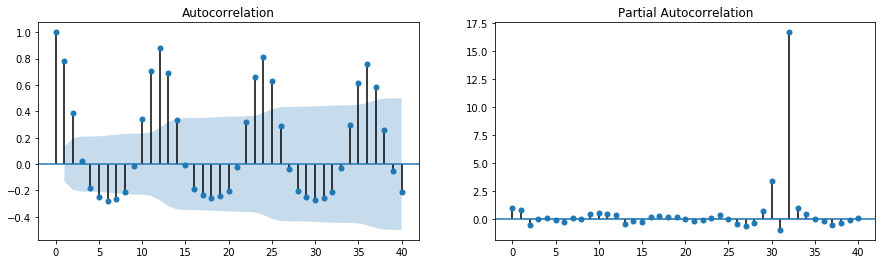

In [123]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(data_df['log_value'], lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(data_df['log_value'], lags=40, ax=axes[1])

## SARIMAX

statsmodels.tsa.statespace.sarimax.SARIMAX
https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html  
How to Tune ARIMA Parameters in Python  
https://machinelearningmastery.com/tune-arima-parameters-python/

In [153]:
sarimax_mod = sm.tsa.statespace.SARIMAX(data_df['log_value'], 
                                        trend='c', 
                                        order=(1,0,2), 
                                        seasonal_order=(0,1,1,12),
                                        enforce_invertibility=False,
                                        enforce_stationarity=False)
sarimax_results = sarimax_mod.fit(maxiter=3000)
print(sarimax_results.summary())

/Users/apple/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                          log_value   No. Observations:                  222
Model:             SARIMAX(1, 0, 2)x(0, 1, 1, 12)   Log Likelihood                 318.326
Date:                            Fri, 14 Sep 2018   AIC                           -624.652
Time:                                    00:14:55   BIC                           -605.014
Sample:                                01-01-2000   HQIC                          -616.701
                                     - 06-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0006      0.000      1.590      0.112      -0.000       0.001
ar.L1          0.9692      0.022   

### Validation
statsmodels.tsa.statespace.sarimax.SARIMAXResults.predict
https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.predict.html#statsmodels.tsa.statespace.sarimax.SARIMAXResults.predict

In [154]:
start_dt = dt.datetime(2015,1,1)
graph_dt = dt.datetime(2010,1,1)
sarimax_df = data_df[['log_value']].copy()
sarimax_df['one_step_forecast'] = sarimax_results.predict(dynamic=False)
sarimax_df['dynamic_forecast'] = sarimax_results.predict(start=start_dt, dynamic=True)

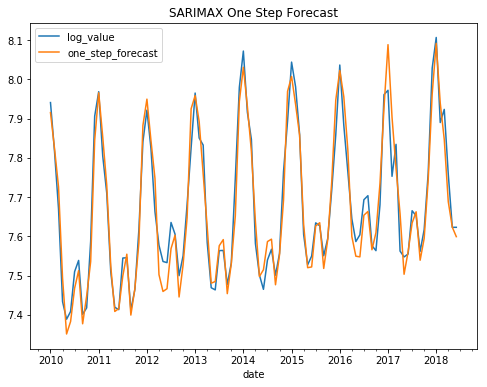

In [155]:
sarimax_df[['log_value', 'one_step_forecast']][sarimax_df.index >= graph_dt].plot(figsize=(8, 6), title='SARIMAX One Step Forecast');

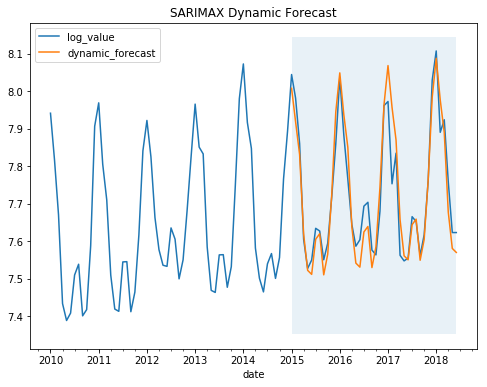

In [156]:
ax = sarimax_df[['log_value', 'dynamic_forecast']][sarimax_df.index >= graph_dt].plot(figsize=(8, 6), title='SARIMAX Dynamic Forecast')
ax.fill_betweenx(ax.get_ylim(), start_dt, sarimax_df.index[-1], alpha=.1, zorder=-1);

### Forecasting

statsmodels.tsa.statespace.sarimax.SARIMAXResults.get_forecast  
https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.get_forecast.html

In [157]:
sarimax_forecast = sarimax_results.get_forecast(steps=100)
sarimax_ci = sarimax_forecast.conf_int()
sarimax_ci.head()

,lower log_value,upper log_value
2018-07-01,7.614682,7.796690
2018-08-01,7.600947,7.803827
2018-09-01,7.495485,7.699726
2018-10-01,7.537481,7.742993
2018-11-01,7.681163,7.887861


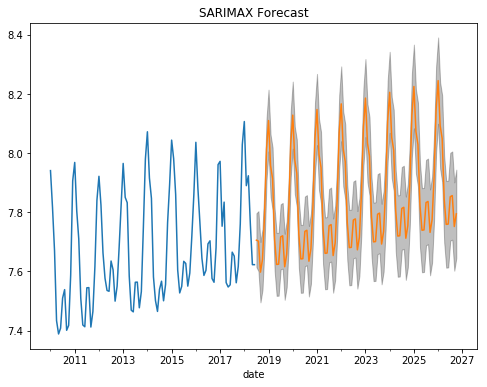

In [158]:
ax = data_df['log_value'][sarimax_df.index >= graph_dt].plot(label='observed', figsize=(8, 6))
sarimax_forecast.predicted_mean.plot(ax=ax, label='Forecast');
ax.fill_between(sarimax_ci.index,
                sarimax_ci.iloc[:, 0],
                sarimax_ci.iloc[:, 1], color='k', alpha=.25);
plt.title('SARIMAX Forecast');